# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection

<h1><font color='ForestGreen'>ESERCITAZIONE 8: VARIATIONAL MC E SIMULATED ANNEALING  </font> </h1>

<h3><font color = 'LightGreen'>Principio Variazionale</font></h3>

In conformita' col Principio Variazionale alla Meccanica quantistica, si puo' affermare che il valore di aspettazione di una Hamiltoniana in un qualsiasi stato quantistico di test e' maggiore dell'energia del ground state; essa e', quindi, il limite inferiore dell'energia
<p style = "text-align:center">
$$  
E_T =\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} =\frac{\int \Psi_T^{*}(\vec{r}_{1} ... \vec{r}_{n}) \hat{H} \Psi_T(\vec{r}_{1} ... \vec{r}_{n})d\vec{r}_{1} ... d\vec{r}_{n}}{\int |\Psi_T^{*}(\vec{r}_{1} ... \vec{r}_{n})|^2 d\vec{r}_{1} ... d\vec{r}_{n}} \ge E_0 = 
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
</p>

Quando l'autofunzione di prova risultera' tendere a quella dello stato fondamentale, il che portera' l'energia trail ad avvicinarsi al minimo; Per procedere, si deve far si che la funzione di prova data sia aratterizzata da paramentri che le permettano di approssimare nel modo migliore possibile l'autofunzione del ground state.

Piu' precisamente, allo scopo di fare una simulazione MC, occorre riscrivere l'espressione di cui sopra nella forma:
<p style = "text-align:center">
$\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$
</p>
dove 
<p style = "text-align:center">
$\rho(x)=\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$
</p>
e
<p style = "text-align:center">
    $E_l(x)=\frac{\hat H \Psi_T(x)}{\Psi_T(x)} \hspace{1cm} \hat H=\frac{-\hbar^2 \nabla^2}{2m} + V(x) \hspace{1cm} V(x) = x^4 - \frac{5}{2}x^2$
</p>
Il cuore della esercitazione presente, in sintesi, non e' nient'altro che campionare la distribuzione $\rho = \rho(x)$ in modo tale da determinare il valore del corrispondente integrale variazionale.
Come prescritto, si assume una funzione d'onda della forma:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
la quale dipende da due parametri: media $\mu$ 
 e deviazione standard $\sigma$.

Nel primo punto si chiede semplicemente di tentare l'algoritmo di Metropolis, nel secondo di utilizzare la tecnica di simulazione del simulated annealing per trovare i parametri estremali che minimizzano l'energia.

<h2><font color = 'LimeGreen'>ESERCIZIO 8.1: Campionamento Funzione d'Onda Metropolis:</font></h2>

In [128]:
N = 150
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

Usando $\mu = 0.8$ e $\sigma = 0.6$, i cui valori, se vogliamo, sono stati scelti a posteriori una volta compiuta la simulazione di ottimizzazione, si trova:

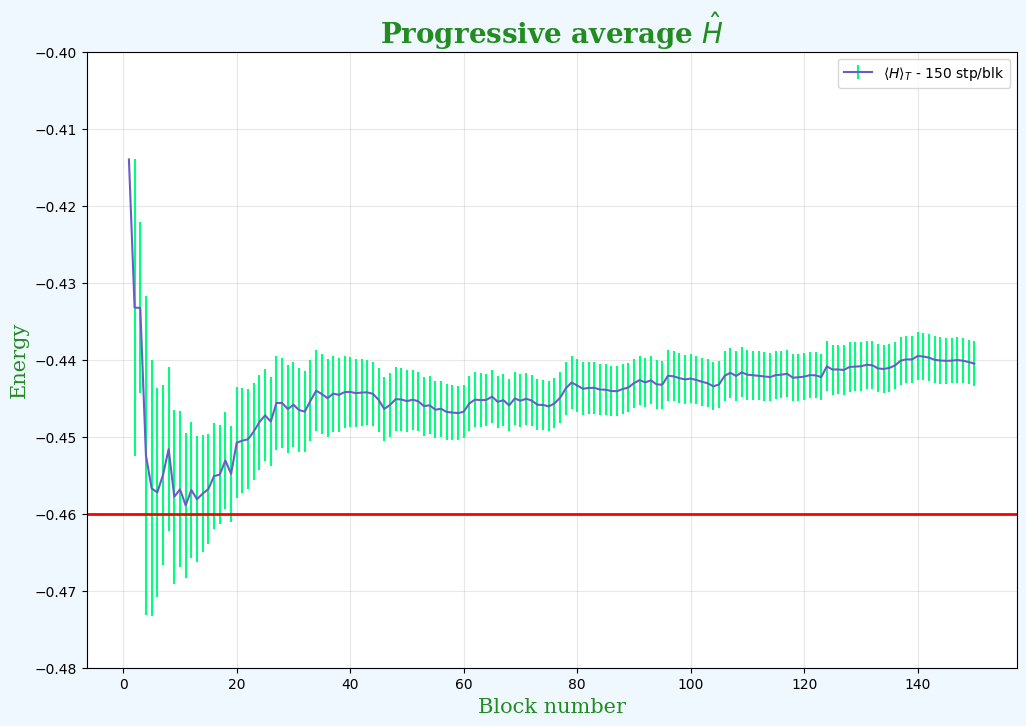

In [129]:
plt.figure(figsize = (12,8), facecolor = "AliceBlue")

pos, ave, err = np.loadtxt("EX_8.1/energia.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 150 stp/blk", 
             color = "SLATEBLUE",
             ecolor = "SpringGreen")

font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Energy', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True, alpha = 0.3)
plt.ylim(-0.48,-0.40)
plt.axhline(y=-0.46, color = 'r', linestyle = '-', linewidth = 2)
plt.title('Progressive average $\hat{H}$', fontsize = 20, fontweight = "bold", family = "serif", color = "ForestGreen")
plt.legend(loc = "best")

plt.savefig("energia.jpeg")

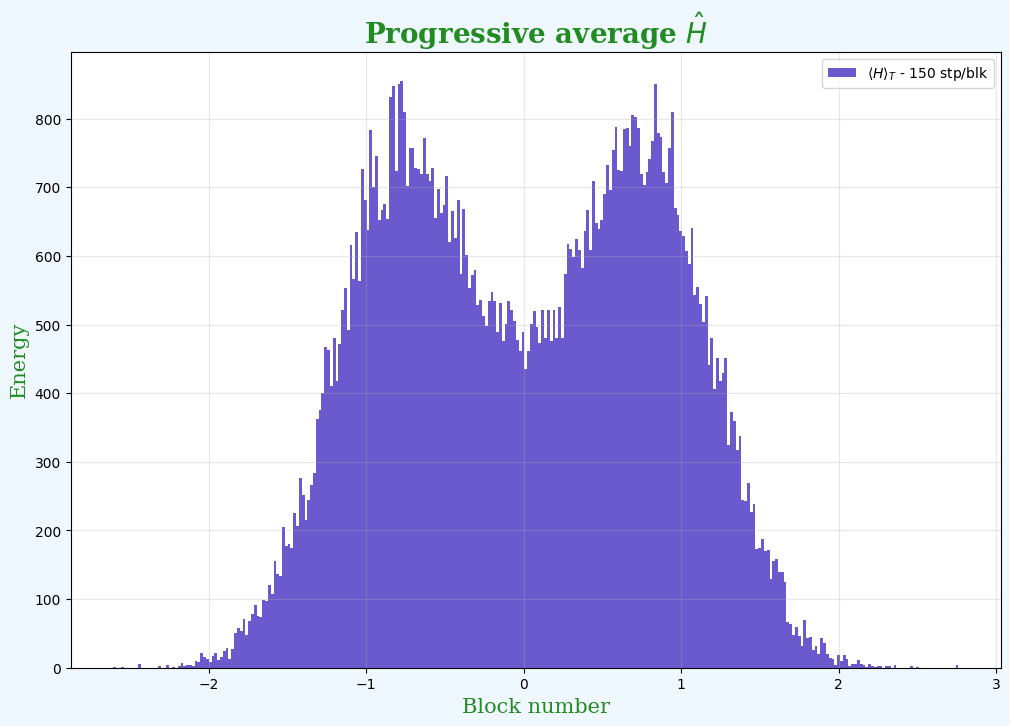

In [139]:
plt.figure(figsize = (12,8), facecolor = "AliceBlue")

ave = np.loadtxt("EX_8.1/funzione_onda.dat", usecols=(0), delimiter=' ', unpack='true')
plt.hist(ave,300, label = r"$\langle H\rangle_T$ - 150 stp/blk", 
             color = "SLATEBLUE")

font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Energy', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True, alpha = 0.3)


plt.title('Progressive average $\hat{H}$', fontsize = 20, fontweight = "bold", family = "serif", color = "ForestGreen")
plt.legend(loc = "best")

plt.savefig("energia.jpeg")

<h2><font color = 'LimeGreen'>ESERCIZIO 8.2: Simulated Annealing:</font></h2>

Andiamo dapprima a plottare l'andamento dell'energia in funzione degli step SA, cioe' delle varie temperatura. Per semplicita' 
di implementazione e soprattutto visualizzazione, si e' considerato piuttosto che la temperature il parametro $\beta$.
Come energia, in questo primo grafico, si e' considerata una media dei campionamenti dell'energia al variare naturalmente dei parametri.

Come legge d'evoluzione, si e' assunta la forma funzionale:
<p style = "text-align:center"> $\beta = \beta_{old}+d\beta$ </p>
dove si e' partiti da $\beta = 1 $ e si e' scelto $d\beta = 10$ <br>

Per quanto concerto i parametri iniziali, si e' preso: $\mu = 0$ e $\sigma = 1$

In [1]:

print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print("NUMERO THROWS =", 100000)
print("NUMERO BLOCCHI =", 50)
print("NUMERO ELEMENTI PER BLOCCO =",int( 100000/50))
print("NUMERO TEMPERATURE =", 50)
print("NUMERO CAMPIONAMENTO A T FISSATA PARAMETRI =", 70)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

NUMERO THROWS = 100000
NUMERO BLOCCHI = 50
NUMERO ELEMENTI PER BLOCCO = 2000
NUMERO TEMPERATURE = 50
NUMERO CAMPIONAMENTO A T FISSATA PARAMETRI = 70

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



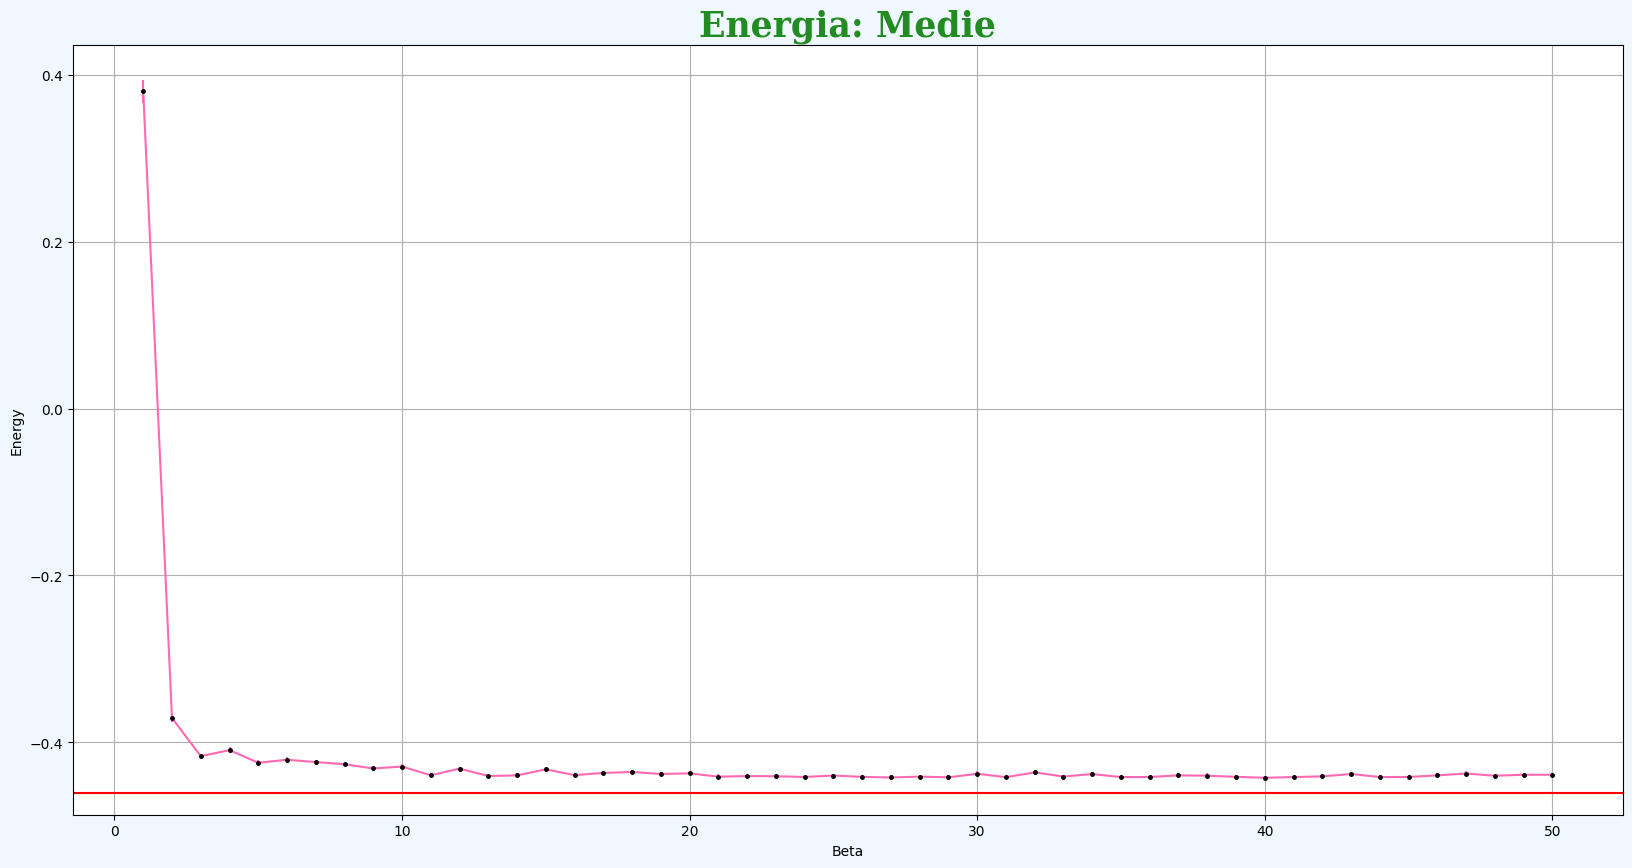

In [111]:
N = 50
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,10), facecolor = "AliceBlue")
plt.title("Energia: Medie", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
beta = np.loadtxt("EX_8.2/inputB.dat", usecols=(0), unpack='true')
mu, sgm = np.loadtxt("EX_8.2/myMeans.dat", usecols=(3,4), delimiter=' ', unpack='true')
H, errH = np.loadtxt("EX_8.2/myMeans.dat", usecols=(1,2), delimiter=' ', unpack='true')
N = len(H)
x = np.arange(N)+1  
plt.errorbar(x, H, errH, color = "hotpink", marker = ".", ms = 5, mec = "black", mfc = "black")
plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)

plt.axhline(y=-0.46, color = 'r', linestyle = '-')

#plt.legend()

plt.show()

Se andiamo a zoomare opportunamente.

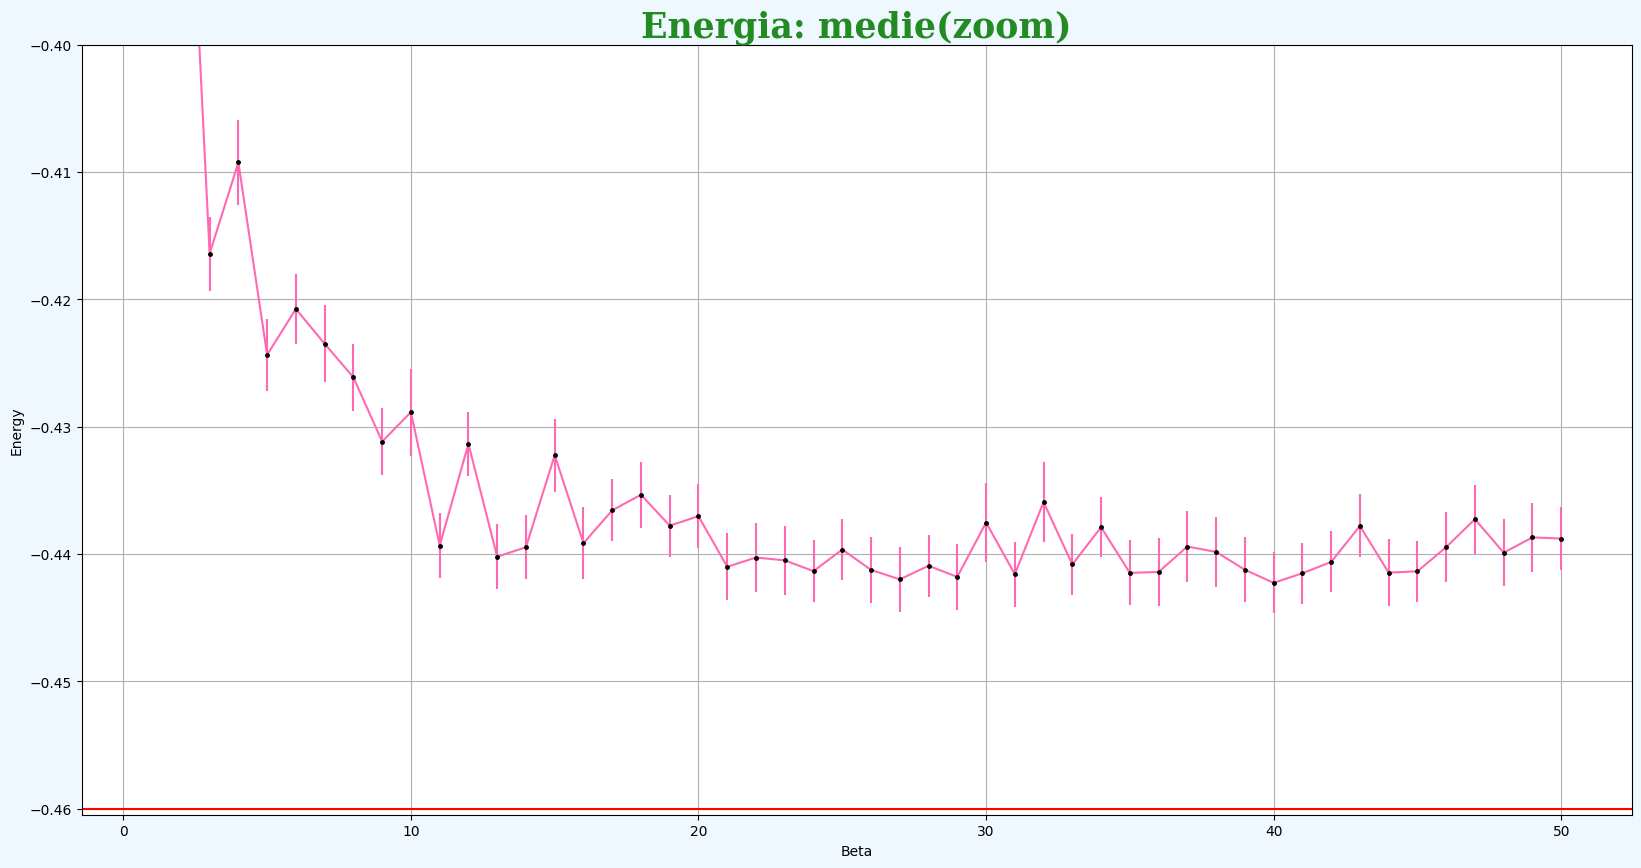

In [112]:
fig=plt.figure(figsize = (20,10), facecolor = "AliceBlue")
plt.title("Energia: medie(zoom)", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
beta = np.loadtxt("EX_8.2/inputB.dat", usecols=(0), unpack='true')
mu, sgm = np.loadtxt("EX_8.2/myMeans.dat", usecols=(3,4), delimiter=' ', unpack='true')
H, errH = np.loadtxt("EX_8.2/myMeans.dat", usecols=(1,2), delimiter=' ', unpack='true')
N = len(H)
x = np.arange(N)+1  
plt.errorbar(x, H, errH, color = "hotpink", marker = ".", ms = 5, mec = "black", mfc = "black")
plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)
plt.ylim(-0.46046587969271513, -0.4)
plt.axhline(y=-0.46, color = 'r', linestyle = '-')

#plt.legend()

plt.show()

Quandanche si prendano ancor piu' valori di H, risultera' sempre maggiore di -0.46: questa infatti  è l'energia del minimo, e siccorme stiamo mediando su energie che oscillano attorno al minimo ci troveremo che mediamente ci collocheremo al di sopra. Si puo' osservare che utilizzando un numero limitato  di campionamenti, l'errore statistico è grande e sufficiente a compensare questo difetto; d'altro canto si ha che peggiora il risultato della simulazione per quanto riguarda la ricerca dei parametri variazionali.

Se anziche' prendere le medie consideriamo gli ultimi valori assunti dall'energia, si ottiene:

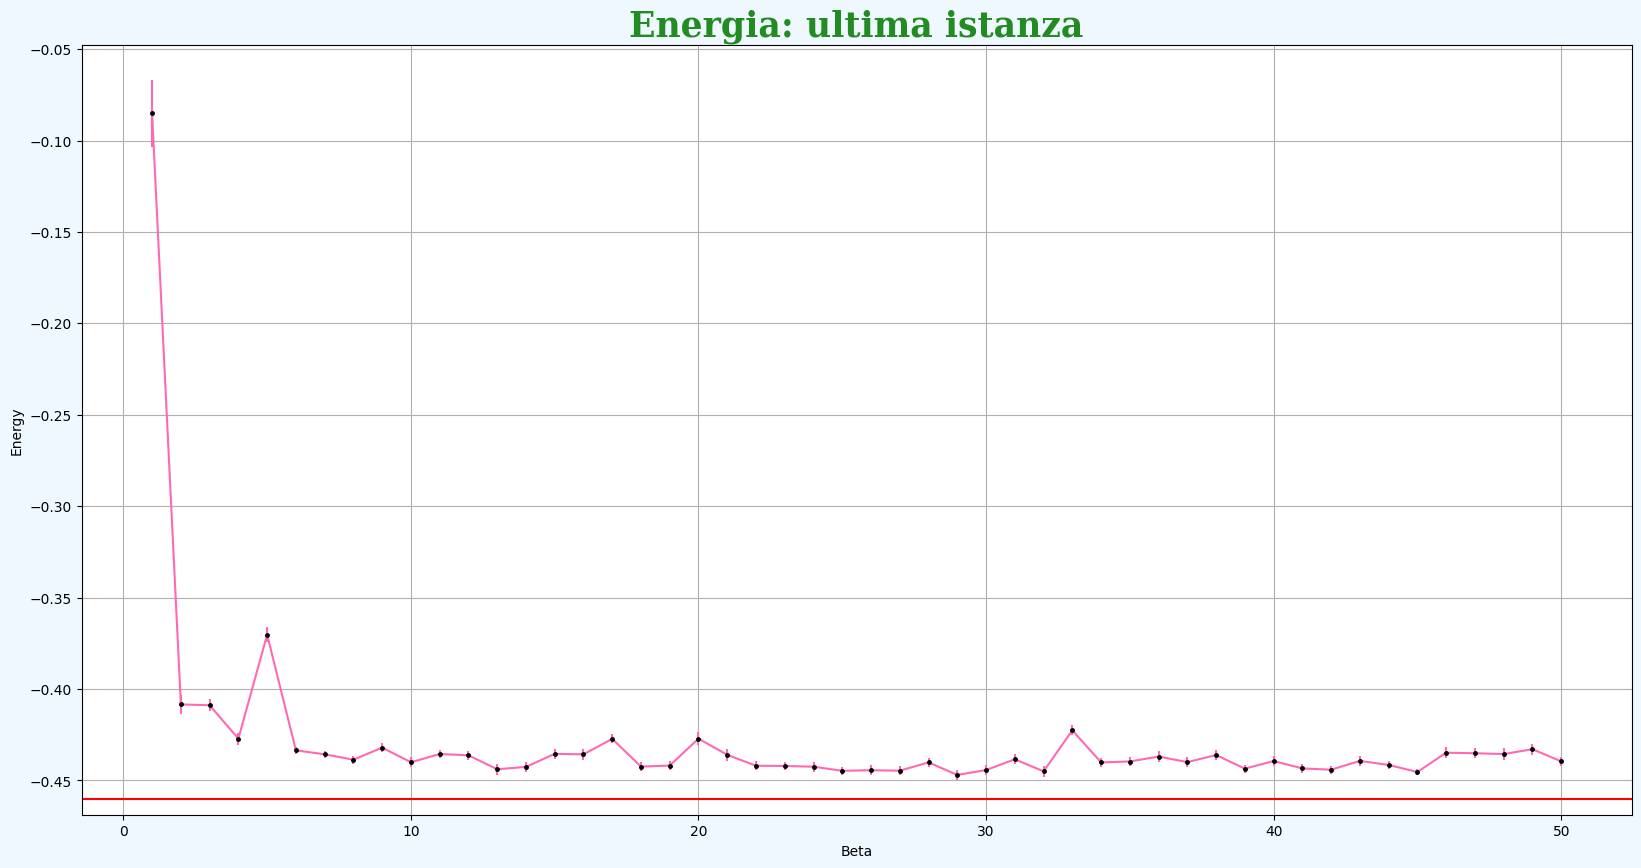

In [113]:
N = 50
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,10), facecolor = "AliceBlue")
plt.title("Energia: ultima istanza", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
beta = np.loadtxt("EX_8.2/inputB.dat", usecols=(0), unpack='true')
mu, sgm = np.loadtxt("EX_8.2/myE_B.dat", usecols=(3,4), delimiter=' ', unpack='true')
H, errH = np.loadtxt("EX_8.2/myE_B.dat", usecols=(1,2), delimiter=' ', unpack='true')
N = len(H)
x = np.arange(N)+1  
plt.errorbar(x, H, errH, color = "hotpink", marker = ".", ms = 5, mec = "black", mfc = "black")
plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)

plt.axhline(y=-0.46, color = 'r', linestyle = '-')

#plt.legend()

plt.show()

Andiamo ora a prendere la traiettoria in funzione degli step considerando nella fattispecie quest'ultimi valori di energia.

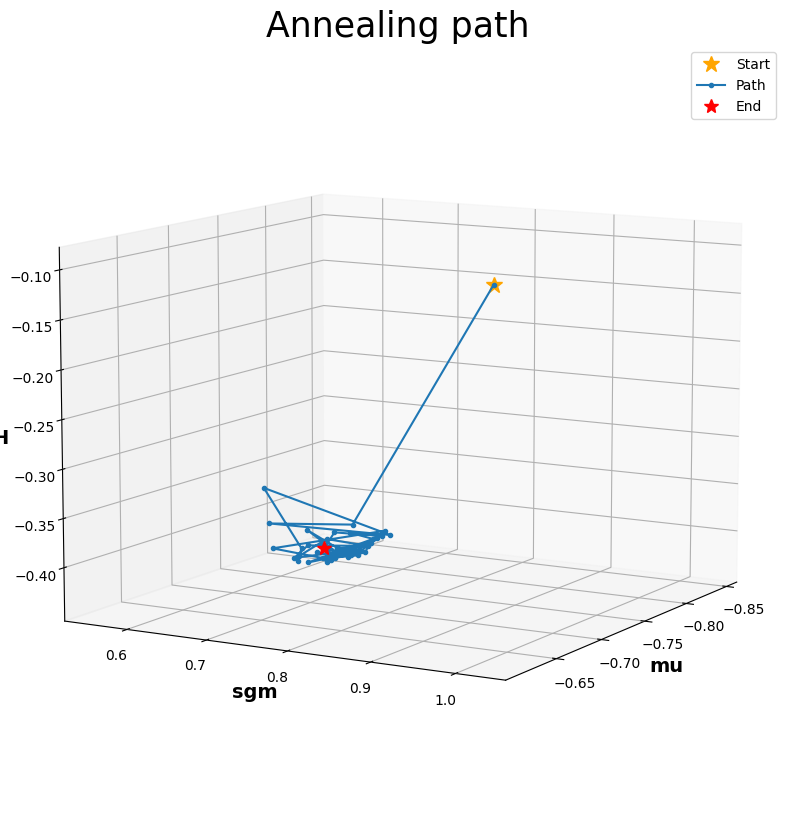

In [114]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111,projection="3d")
fig.add_axes(ax)
ax.plot(mu[0], sgm[0], H[0], marker='*', markersize = 12, color = "orange", label = "Start", linestyle = "")
ax.plot(mu, sgm, H, marker='.', linestyle = "-", label = "Path")
ax.plot(mu[-1], sgm[-1], H[-1], marker='*', markersize = 10, color = "r", label = "End", linestyle = "")
ax.set_xlabel('mu', fontweight = "bold", fontsize = 14)
ax.set_ylabel('sgm', fontweight = "bold", fontsize = 14)
ax.set_zlabel('H', fontweight ="bold", fontsize = 14)
plt.title("Annealing path", fontsize = 25)
ax.legend()

ax.view_init(10, 30)
plt.show()

Si noti che il campionamento e' piuttosto efficiete e si raggiunge l'ottimo, pur partendo da un generico punto, in maniera eccellente.

Considerando invece solo lo spazio delle configurazioni dei parametri, si ha:

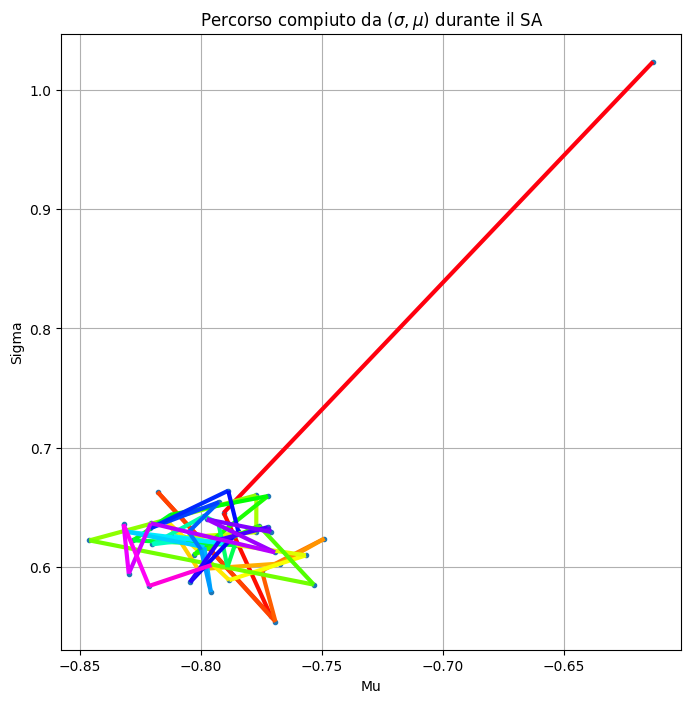

In [115]:
mu, sig = np.loadtxt("EX_8.2/myE_B.dat", usecols=(3,4), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8))

plt.plot(mu, sig,marker=".", linewidth=0)
plt.title("Percorso compiuto da $(\sigma,\mu)$ durante il SA")
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([mu, sig]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

Puo' essere interessante anche andare a guardare il caso in cui per ogni T si va a considerare come valore dell'energia quello minimo, in questo caso:

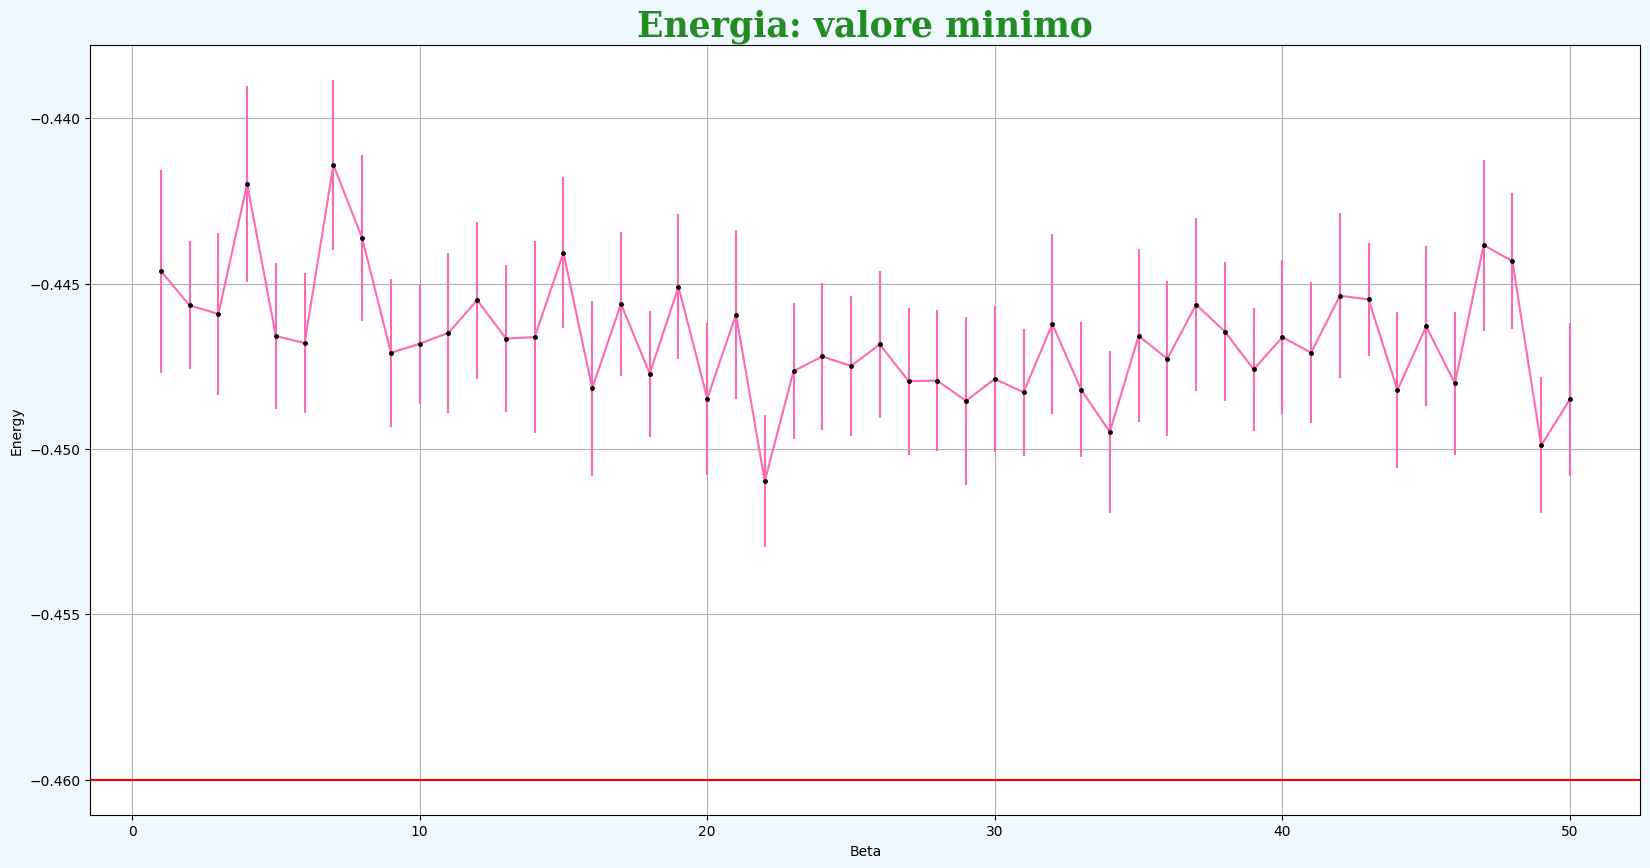

In [116]:
N = 50
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,10), facecolor = "AliceBlue")
plt.title("Energia: valore minimo", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")
beta = np.loadtxt("EX_8.2/inputB.dat", usecols=(0), unpack='true')
mu, sgm = np.loadtxt("EX_8.2/myMin.dat", usecols=(3,4), delimiter=' ', unpack='true')
H, errH = np.loadtxt("EX_8.2/myMin.dat", usecols=(1,2), delimiter=' ', unpack='true')
N = len(H)
x = np.arange(N)+1  
plt.errorbar(x, H, errH, color = "hotpink", marker = ".", ms = 5, mec = "black", mfc = "black")
plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)

plt.axhline(y=-0.46, color = 'r', linestyle = '-')

#plt.legend()

plt.show()

Notiamo che ora, prendendo i singoli campionamenti minini, sarebbe perfettamente legittimo avere valori inferiori al valore di GS in virtu' della stocasticita' del calcolo. D'altra parte, si constata che tale risultato e' perfettamente legittimo entro l'incertezza MC con cui si e' stimata l'energia.

In [117]:
m = np.argmin(np.abs(H + 0.46046587969271513))
min_H = H[m]
min_errH = errH[m]
min_mu = mu[m]
min_sigma = sig[m]

print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('ENERGIA = ')
print(min_H,"+/-", min_errH)
print('MU = ')
print(min_mu)
print("SIGMA = ")
print(min_sigma)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

ENERGIA = 
-0.450973 +/- 0.00200338
MU = 
-0.797617
SIGMA = 
0.622388

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



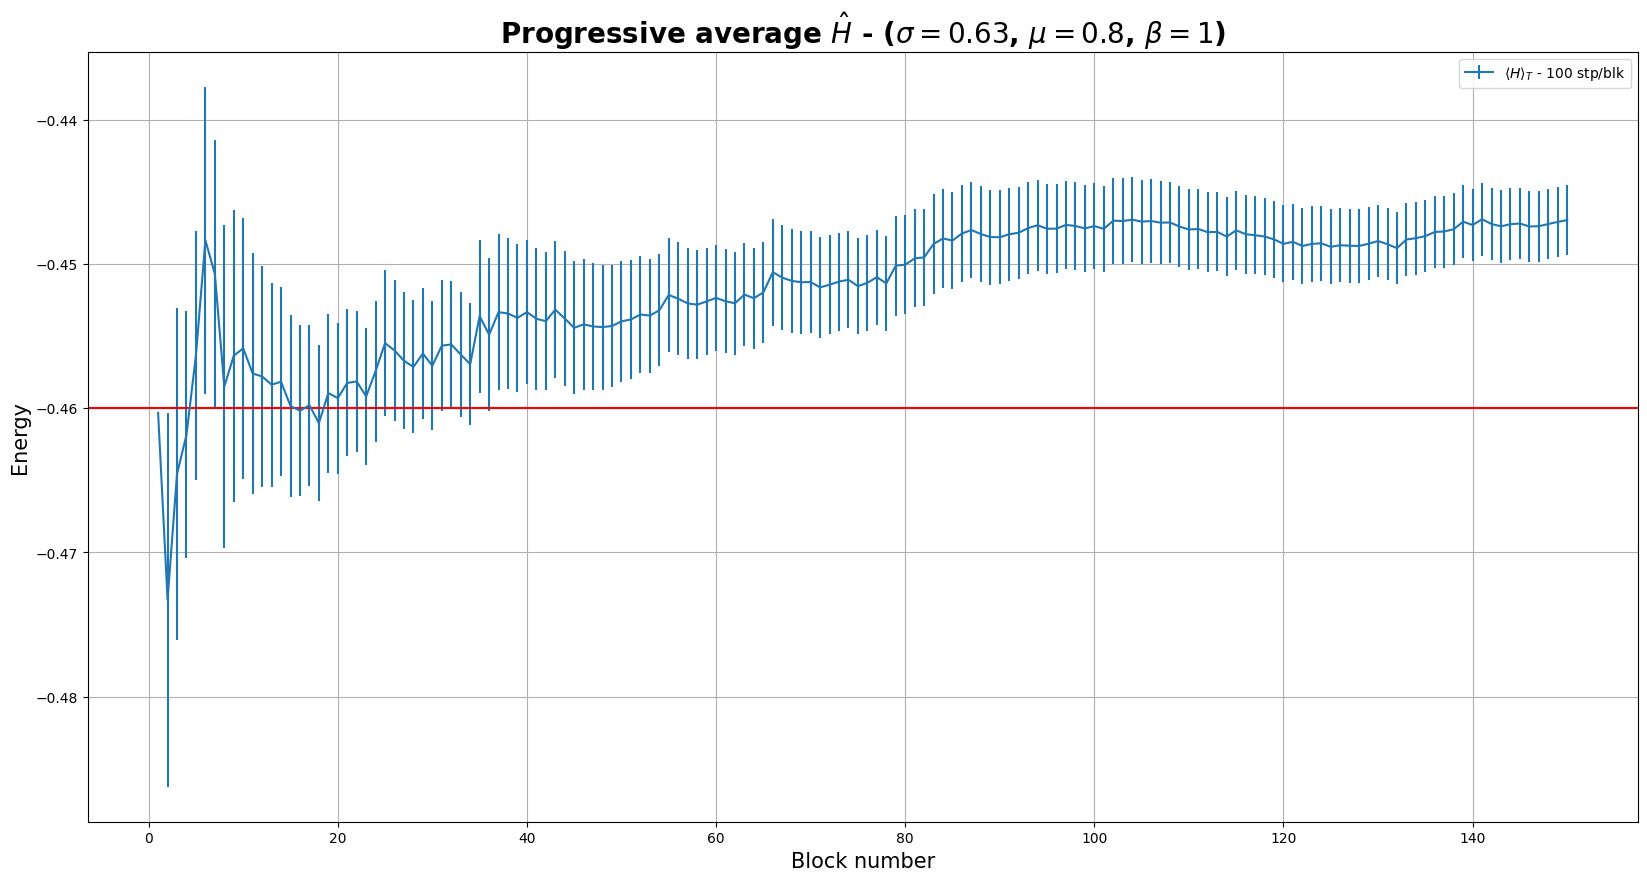

In [118]:
N = 150
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (20,10))

pos, ave, err = np.loadtxt("EX_8.2/MINIMIZZAZIONE/energia.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$") 
plt.ylabel('Energy', fontsize = 15)
plt.xlabel('Blocks', fontsize = 15)
plt.grid(True)
plt.title(r'Progressive average $\hat{H}$ - ', fontsize = 20, fontweight = "bold")
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.legend()

plt.show()

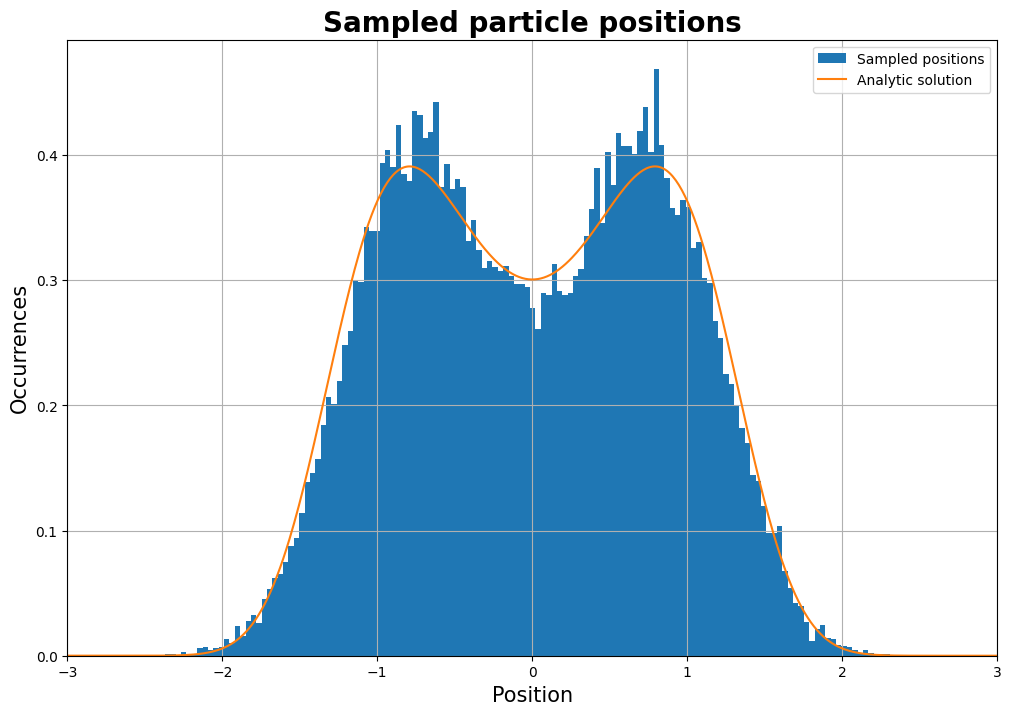

In [120]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 300

#---------------------------------------

plt.figure(figsize = (12,8))

histofill_blk = 1000                  # numero di posizioni salvate per blocco (cfr input.dat)
x = np.linspace(-3,3,100)      # uso l'ordinamento da 1 a N

mu = min_mu
sgm = min_sigma
def f(x):
   return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

pos = np.loadtxt("EX_8.2/MINIMIZZAZIONE/funzione_onda.dat", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 150, density = "true", label = "Sampled positions")
#plt.plot(x,f(x)**2/np.e, label = "$\psi^2/e$")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions", fontsize = 20, fontweight = "bold")
plt.grid(True)
plt.legend()

#-------------Analytic solution-----------------

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label='Analytic solution')
plt.xlim(-3,+3)
plt.legend()
